# Setup

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns

In [15]:
def print_classification_report(y, y_pred):
    matriz_confusion = confusion_matrix(y,y_pred)
    matriz_confusion_df = pd.DataFrame(matriz_confusion, index=['False','True'], columns=['False','True'])
    print(matriz_confusion_df)
    accuracy= accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy}")
    precision = precision_score(y, y_pred)
    print(f"Precision: {precision}")
    recall = recall_score(y, y_pred)
    print(f"Recall: {recall}")
    auc = roc_auc_score(y, y_pred)
    print(f"Area bajo la curva: {auc}")

# LECTURA DEL FICHERO

In [16]:
diabetes_df = pd.read_csv('diabetes.csv')

In [17]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# SEPARACIÓN DE VARIABLES INDEPENDIENTES Y VARIABLE DEPENDIENTE

In [19]:
X = diabetes_df[['Glucose','BMI']]
y = diabetes_df['Outcome']

In [20]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_standard_scaler = StandardScaler().fit_transform(X_resampled)

---

# REGRESIÓN LOGÍSTICA vs KNN


## 1. Diagrama de dispersión de Glucosa vs BMI coloreando por Outcome


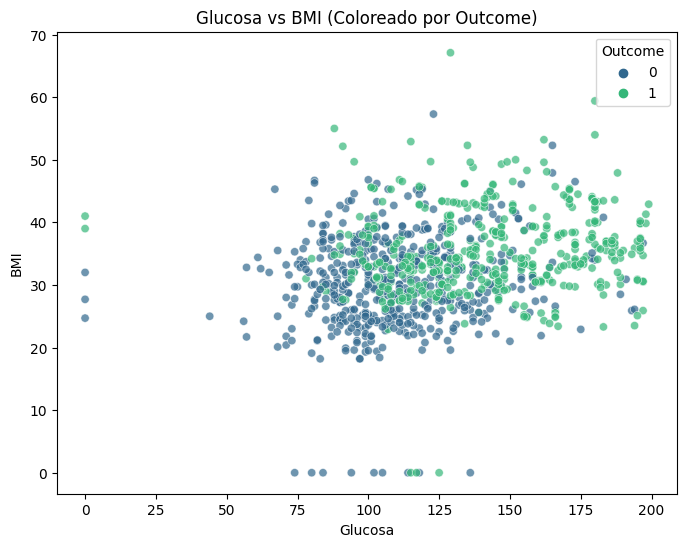

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled['Glucose'], y=X_resampled['BMI'], hue=y_resampled, palette="viridis", alpha=0.7)
plt.title("Glucosa vs BMI (Coloreado por Outcome)")
plt.xlabel("Glucosa")
plt.ylabel("BMI")
plt.legend(title="Outcome")
plt.show()


## 2. Modelo de regresión logística y diagrama por y_pred

In [24]:
# 2. Modelo de regresión logística y diagrama por y_pred
logreg = LogisticRegression(random_state=42)
logreg.fit(X_standard_scaler, y_resampled)
y_pred_logreg = logreg.predict(X_standard_scaler)

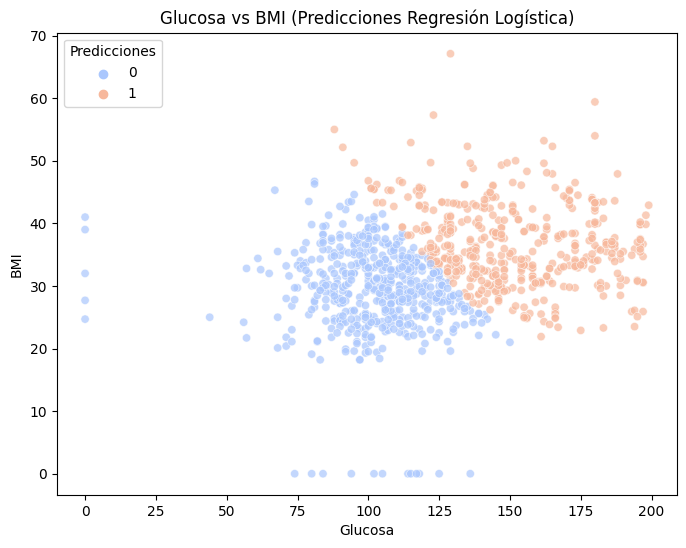

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled['Glucose'], y=X_resampled['BMI'], hue=y_pred_logreg, palette="coolwarm", alpha=0.7)
plt.title("Glucosa vs BMI (Predicciones Regresión Logística)")
plt.xlabel("Glucosa")
plt.ylabel("BMI")
plt.legend(title="Predicciones")
plt.show()

## 3. Modelo KNN y diagrama por y_pred


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_standard_scaler, y_resampled)
y_pred_knn = knn.predict(X_standard_scaler)

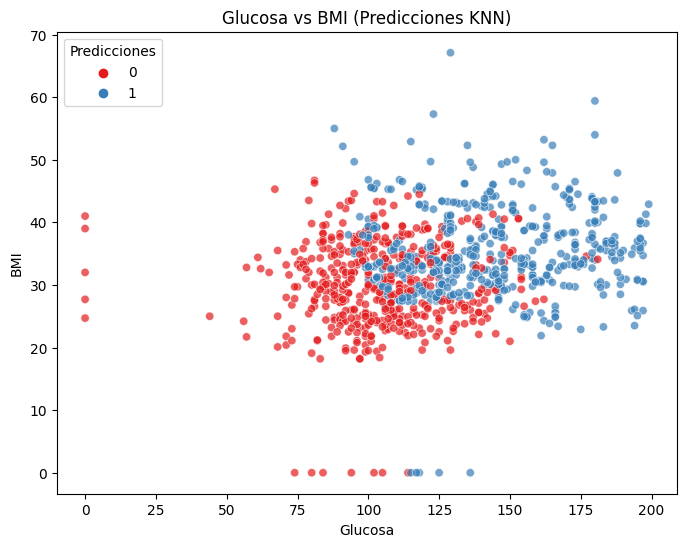

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled['Glucose'], y=X_resampled['BMI'], hue=y_pred_knn, palette="Set1", alpha=0.7)
plt.title("Glucosa vs BMI (Predicciones KNN)")
plt.xlabel("Glucosa")
plt.ylabel("BMI")
plt.legend(title="Predicciones")
plt.show()

## 4. Evaluar métricas de modelos

In [30]:
# Evaluar el modelo de regresión logística
print("Métricas para el modelo de Regresión Logística:")
print_classification_report(y_resampled, y_pred_logreg)

# Evaluar el modelo KNN
print("Métricas para el modelo KNN:")
print_classification_report(y_resampled, y_pred_knn)

Métricas para el modelo de Regresión Logística:
       False  True
False    376   124
True     151   349
Accuracy: 0.725
Precision: 0.7378435517970402
Recall: 0.698
Area bajo la curva: 0.725
Métricas para el modelo KNN:
       False  True
False    386   114
True      69   431
Accuracy: 0.817
Precision: 0.7908256880733945
Recall: 0.862
Area bajo la curva: 0.8170000000000001


In [31]:
# Crear un diccionario con las métricas de ambos modelos
metrics = {
    "Modelo": ["Regresión Logística", "KNN"],
    "Accuracy": [
        accuracy_score(y_resampled, y_pred_logreg),
        accuracy_score(y_resampled, y_pred_knn),
    ],
    "Precision": [
        precision_score(y_resampled, y_pred_logreg),
        precision_score(y_resampled, y_pred_knn),
    ],
    "Recall": [
        recall_score(y_resampled, y_pred_logreg),
        recall_score(y_resampled, y_pred_knn),
    ],
    "AUC": [
        roc_auc_score(y_resampled, y_pred_logreg),
        roc_auc_score(y_resampled, y_pred_knn),
    ],
}

# Crear un DataFrame para mostrar la comparación
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla directamente en el notebook
from IPython.display import display
display(metrics_df)

,Modelo,Accuracy,Precision,Recall,AUC
0,Regresión Logística,0.725,0.737844,0.698,0.725
1,KNN,0.817,0.790826,0.862,0.817


# Resumen

Comparación de Métricas:


,Modelo,Accuracy,Precision,Recall,AUC
0,Regresión Logística,0.725000,0.737844,0.698000,0.725000
1,KNN,0.817000,0.790826,0.862000,0.817000


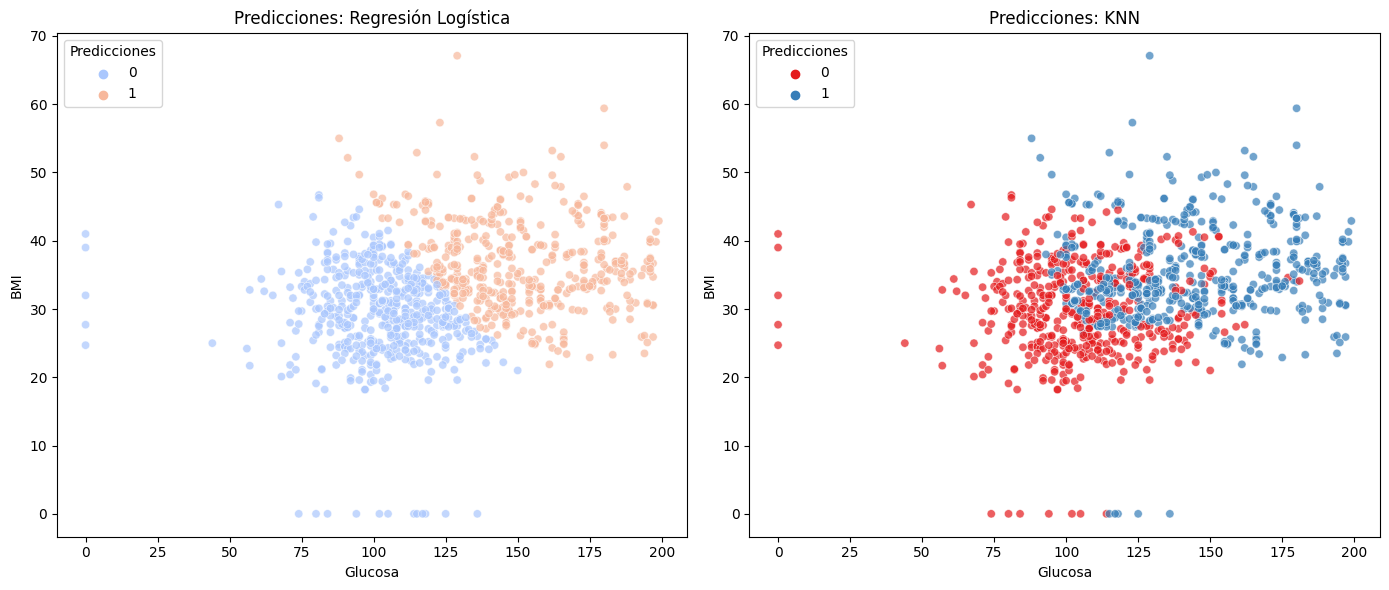

In [38]:
# Mostrar la tabla con un tamaño de texto más grande
print("Comparación de Métricas:")
metrics_df_styled = metrics_df.style.set_properties(**{'font-size': '20px'})
display(metrics_df_styled)


# Crear una figura con subplots para las gráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de Regresión Logística
sns.scatterplot(
    x=X_resampled['Glucose'], 
    y=X_resampled['BMI'], 
    hue=y_pred_logreg, 
    palette="coolwarm", 
    alpha=0.7, 
    ax=axes[0]
)
axes[0].set_title("Predicciones: Regresión Logística")
axes[0].set_xlabel("Glucosa")
axes[0].set_ylabel("BMI")
axes[0].legend(title="Predicciones", loc="upper left")

# Gráfica de KNN
sns.scatterplot(
    x=X_resampled['Glucose'], 
    y=X_resampled['BMI'], 
    hue=y_pred_knn, 
    palette="Set1", 
    alpha=0.7, 
    ax=axes[1]
)
axes[1].set_title("Predicciones: KNN")
axes[1].set_xlabel("Glucosa")
axes[1].set_ylabel("BMI")
axes[1].legend(title="Predicciones", loc="upper left")

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# Comparación de Modelos

## 1. Métricas de los Modelos

| Modelo                 | Accuracy | Precision | Recall | AUC   | Comentario                                                                                     |
|------------------------|----------|-----------|--------|-------|-------------------------------------------------------------------------------------------------|
| **Regresión Logística**| 0.725    | 0.738     | 0.698  | 0.725 | Rendimiento decente en precisión y AUC. Recall más bajo, indicando que podría perder positivos. |
| **KNN**               | 0.817    | 0.791     | 0.862  | 0.817 | Supera a la Regresión Logística en todas las métricas, con mejor Recall y balance general.      |

**Conclusión:** El modelo KNN es claramente superior, con mayor capacidad para capturar positivos reales y mejor equilibrio general entre clases.

---

## 2. Gráficos de Dispersión

| Modelo                 | Observaciones                                                                                   |
|------------------------|------------------------------------------------------------------------------------------------|
| **Regresión Logística**| El modelo separa las clases linealmente, pero no se ajusta bien a datos no lineales. Mezcla de clases en los límites. |
| **KNN**               | Clasifica los datos más efectivamente, especialmente en zonas con mezcla de clases. Identifica positivos reales mejor. |

**Conclusión:** La naturaleza no lineal del KNN le otorga ventaja sobre la Regresión Logística, especialmente en datasets con separación no lineal.


# Elección del Modelo

## Ventajas del modelo KNN:
- Mejor rendimiento general (todas las métricas).
- Identificación más precisa de positivos reales (alto Recall).
- Mejor adaptabilidad a datos no lineales.

## Limitaciones del modelo KNN:
- Puede ser computacionalmente más costoso para datasets grandes, ya que almacena todos los datos de entrenamiento.
- Es más sensible a los datos ruidosos.

## Ventajas de la Regresión Logística:
- Modelo más sencillo y rápido de entrenar y predecir.
- Interpretabilidad clara, ya que proporciona coeficientes que muestran la influencia de cada variable.


---